# Bank Customer Churn Porject:
### Using supervised learning models to identify customer who are likely to churn and top features that influence user retention
# Content
* Data Exploration
* Feature Preprocessing
* Model Training and Results Evaluation
* Conclusion and Recommendation



In [ ]:
# install pydrive to load data
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



df = pd.read_csv('bank_churn.csv')

# Data Exploration

## Understand raw data

In [ ]:
df.head(3) # check data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [ ]:
df.info() # check feature data type see (no missing value)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.isnull().sum() # verified

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
df.nunique() # row number and customerid seems not useful (can be dropped)

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

## Understand Features

In [ ]:
# numerical features 
numerical_features = ['CreditScore', 'Age', 'Tenure', 'NumOfProducts','Balance', 'EstimatedSalary']
df[numerical_features].describe() # get statistical info of numerical features

,CreditScore,Age,Tenure,NumOfProducts,Balance,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,1.530200,76485.889288,100090.239881
std,96.653299,10.487806,2.892174,0.581654,62397.405202,57510.492818
min,350.000000,18.000000,0.000000,1.000000,0.000000,11.580000
25%,584.000000,32.000000,3.000000,1.000000,0.000000,51002.110000
50%,652.000000,37.000000,5.000000,1.000000,97198.540000,100193.915000
75%,718.000000,44.000000,7.000000,2.000000,127644.240000,149388.247500
max,850.000000,92.000000,10.000000,4.000000,250898.090000,199992.480000


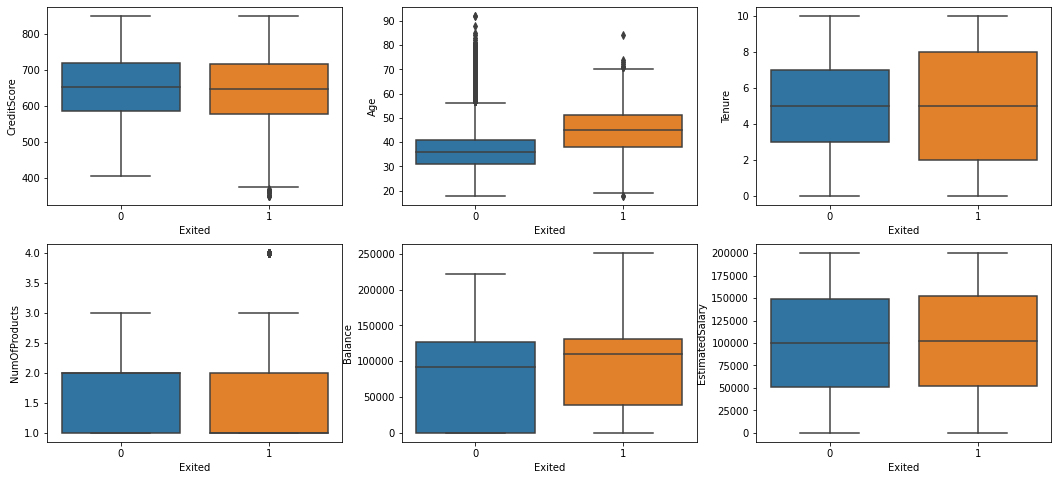

In [ ]:
# Exploring the relationship between numerical features and targets
## By oberserving the boxoplots, credict score, tenure, numberofproduct and esitmate salary seems has not strong influence on the churn probabliy
## older people and high balance people have high probablit to churn  
_,axss = plt.subplots(2,3, figsize=[18,8])
sns.boxplot(x='Exited', y ='CreditScore', data=df, ax=axss[0][0])
sns.boxplot(x='Exited', y ='Age', data=df, ax=axss[0][1])
sns.boxplot(x='Exited', y ='Tenure', data=df, ax=axss[0][2])
sns.boxplot(x='Exited', y ='NumOfProducts', data=df, ax=axss[1][0])
sns.boxplot(x='Exited', y ='Balance', data=df, ax=axss[1][1])
sns.boxplot(x='Exited', y ='EstimatedSalary', data=df, ax=axss[1][2])

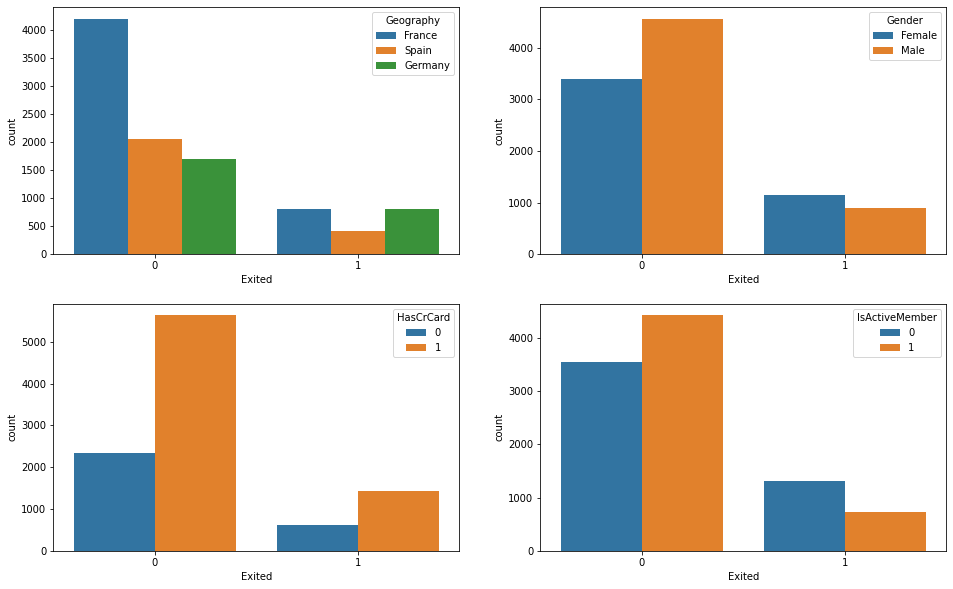

In [ ]:
# Exploring the relationship between categorical features and targets
## insights: germany has higher probability  to churn
## female has higher probability  to churn
## incative user has lower probability 
## hascrcard does not show strong influence
_,axss = plt.subplots(2,2, figsize=[16,10])
sns.countplot(x='Exited', hue='Geography', data=df, ax=axss[0][0])
sns.countplot(x='Exited', hue='Gender', data=df, ax=axss[0][1])
sns.countplot(x='Exited', hue='HasCrCard', data=df, ax=axss[1][0])
sns.countplot(x='Exited', hue='IsActiveMember', data=df, ax=axss[1][1])

# Feature Processing

In [ ]:
#  dropping useless feature
y = df['Exited'] # exited is the target
to_drop = ['RowNumber','CustomerId','Surname','Exited']
X = df.drop(to_drop, axis=1)

In [ ]:
print(X.dtypes)
X.head(2)

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
dtype: object


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58


In [ ]:
cat_cols = X.columns[X.dtypes == 'object']
num_cols = X.columns[(X.dtypes == 'float64') | (X.dtypes == 'int64')]

In [ ]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, stratify = y, random_state=1) #stratified sampling

In [ ]:
X_train.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
7971,633,Spain,Male,42,10,0.00,1,0,1,79408.17
9152,708,Germany,Female,23,4,71433.08,1,1,0,103697.57


In [ ]:
# one hot encoding for categorical features
X_train = pd.get_dummies(X_train, columns = ['Gender','Geography'])
X_test = pd.get_dummies(X_test, columns = ['Gender','Geography'])

In [ ]:
display(X_train[:2])
display(X_test[:2])

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
7971,633,42,10,0.00,1,0,1,79408.17,0,1,0,0,1
9152,708,23,4,71433.08,1,1,0,103697.57,1,0,0,1,0


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
2660,767,44,2,152509.25,1,1,1,136915.15,1,0,1,0,0
3535,662,37,5,94901.09,1,1,1,48233.75,0,1,0,0,1


In [ ]:
# numerical featrues standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train[num_cols])
X_train[num_cols] = scaler.transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [ ]:
display(X_train[:2])
display(X_test[:2])

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
7971,-0.172985,0.289202,1.731199,-1.218916,-0.912769,-1.542199,0.968496,-0.352044,0,1,0,0,1
9152,0.602407,-1.509319,-0.341156,-0.076977,-0.912769,0.648425,-1.032529,0.072315,1,0,0,1,0


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
2660,1.212382,0.478520,-1.031940,1.219117,-0.912769,0.648425,0.968496,0.652657,1,0,1,0,0
3535,0.126833,-0.184093,0.004237,0.298185,-0.912769,0.648425,0.968496,-0.896690,0,1,0,0,1


# Model Training and Evaluation

## Model Training

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


### Logistic Regression

In [ ]:
# Logistic Regression
classifier_logistic = LogisticRegression()
classifier_logistic.fit(X_train, y_train)
classifier_logistic.predict(X_test)
classifier_logistic.score(X_test, y_test)

0.8084

Best score: 0.8125333333333333
Best parameters set:
C:1
penalty:l1


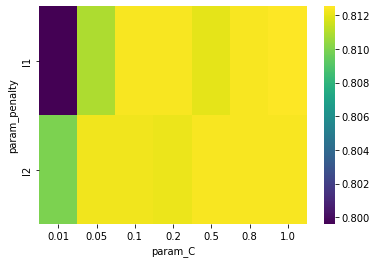

In [ ]:
# Fine tuning LR model by Gird search
def print_grid_search_metrics(gs):
    print ("Best score: " + str(gs.best_score_))
    print ("Best parameters set:")
    best_parameters = gs.best_params_
    for param_name in sorted(best_parameters.keys()):
        print(param_name + ':' + str(best_parameters[param_name]))


parameters = {'penalty':('l2','l1'), 'C':(0.01, 0.05, 0.1, 0.2,0.5, 0.8, 1)}
Grid_LR = GridSearchCV(LogisticRegression(solver='liblinear'),parameters, cv=5)
Grid_LR.fit(X_train, y_train)
print_grid_search_metrics(Grid_LR)
LR_models = pd.DataFrame(Grid_LR.cv_results_)
res = (LR_models.pivot(index='param_penalty', columns='param_C', values='mean_test_score')     )
_ = sns.heatmap(res, cmap='viridis')

In [ ]:
best_LR_model = Grid_LR.best_estimator_
best_LR_model.score(X_test, y_test)  

0.8092

### KNN 

In [ ]:
# K Nearest Neighbors
classifier_KNN = KNeighborsClassifier()
classifier_KNN.fit(X_train,y_train)
classifier_KNN.predict(X_test)
classifier_KNN.score(X_test,y_test)

0.8284

In [ ]:
# Fine tuning KNN models by GirdSearchCV
parameters = {'n_neighbors':[1,3,5,7,9,11]}
Grid_KNN = GridSearchCV(KNeighborsClassifier(),parameters, cv=5)
Grid_KNN.fit(X_train, y_train)
print_grid_search_metrics(Grid_KNN)

Best score: 0.8408
Best parameters set:
n_neighbors:11


In [ ]:
best_KNN_model = Grid_KNN.best_estimator_
best_KNN_model.score(X_test,y_test)

0.8368

### Random Forest 

In [ ]:
# Random Forest
classifier_RF = RandomForestClassifier()
classifier_RF.fit(X_train,y_train)
classifier_RF.predict(X_test)
classifier_RF.score(X_test,y_test)

0.8592

In [ ]:
parameters = {'n_estimators' : [60,80,100],'max_depth': [1,5,10] }
Grid_RF = GridSearchCV(RandomForestClassifier(),parameters, cv=5)
Grid_RF.fit(X_train, y_train)
print_grid_search_metrics(Grid_RF)

Best score: 0.8637333333333335
Best parameters set:
max_depth:10
n_estimators:100


In [ ]:
best_RF_model = Grid_RF.best_estimator_
best_RF_model.score(X_test,y_test)

0.8596

##Model Evaluation

### Confusion Matrix - Accuracy, Percision, Reacall, and F1- score

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn import metrics

In [ ]:
# calculate accuracy, precision and recall, [[tn, fp],[]]
def cal_evaluation(classifier, cm):
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1]
    accuracy  = (tp + tn) / (tp + fp + fn + tn + 0.0)
    precision = tp / (tp + fp + 0.0)
    recall = tp / (tp + fn + 0.0)
    F1 = 2/(1/precision+1/recall)
    print (classifier)
    print ("Accuracy is: " + str(accuracy))
    print ("precision is: " + str(precision))
    print ("recall is: " + str(recall))
    print ('F1 Score is:' + str(F1))

# print out confusion matrices
def draw_confusion_matrices(confusion_matricies):
    class_names = ['Not','Churn']
    for cm in confusion_matrices:
        classifier, cm = cm[0], cm[1]
        cal_evaluation(classifier, cm)

In [ ]:
# Confusion matrix, accuracy, precison and recall for random forest and logistic regression
confusion_matrices = [
    ("Random Forest", confusion_matrix(y_test,best_RF_model.predict(X_test))),
    ("Logistic Regression", confusion_matrix(y_test,best_LR_model.predict(X_test))),
    ("K nearest neighbor", confusion_matrix(y_test, best_KNN_model.predict(X_test)))
]

draw_confusion_matrices(confusion_matrices)

Random Forest
Accuracy is: 0.8596
precision is: 0.80859375
recall is: 0.4066797642436149
F1 Score is:0.5411764705882353
Logistic Regression
Accuracy is: 0.8092
precision is: 0.5963855421686747
recall is: 0.1944990176817289
F1 Score is:0.29333333333333333
K nearest neighbor
Accuracy is: 0.8368
precision is: 0.7078189300411523
recall is: 0.3379174852652259
F1 Score is:0.45744680851063824


### ROC-AUC Curve

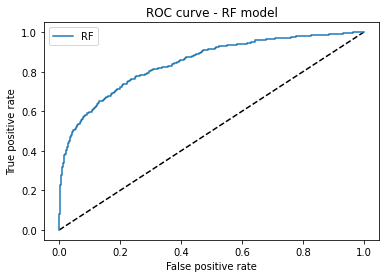

RF AUC is:0.8458229024717318


In [ ]:
# AUC of Random Forest
y_pred_rf = best_RF_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - RF model')
plt.legend(loc='best')
plt.show()
print('RF AUC is:'+ str(metrics.auc(fpr_rf,tpr_rf)))

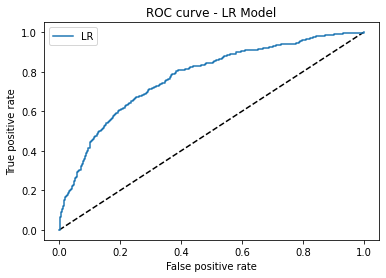

LR AUC is:0.7721978766926612


In [ ]:
# AUC of Logistic Regression
y_pred_lr = best_LR_model.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, thresh = roc_curve(y_test, y_pred_lr)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - LR Model')
plt.legend(loc='best')
plt.show()
print('LR AUC is:'+str(metrics.auc(fpr_lr,tpr_lr)))

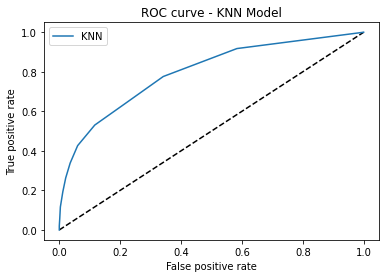

KNN AUC is:0.7954893286981989


In [ ]:
# AUC of Logistic Regression
y_pred_KNN = best_KNN_model.predict_proba(X_test)[:, 1]
fpr_KNN, tpr_KNN, thresh = roc_curve(y_test, y_pred_KNN)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_KNN, tpr_KNN, label='KNN')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - KNN Model')
plt.legend(loc='best')
plt.show()
print('KNN AUC is:'+str(metrics.auc(fpr_KNN,tpr_KNN)))

In [ ]:

# Depend on the results of model evaluations, Random Froest Model is the best, and the feature importance of this model is analyzed as below 
X_RF = X.copy()
X_RF = pd.get_dummies(X_RF,columns = ['Gender','Geography'])
X_RF.head(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,0,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,1,0,0,0,1


## Feature Importance

### Permutation Importance

In [ ]:
from sklearn.inspection import permutation_importance
PI = permutation_importance(best_RF_model, X_test, y_test, n_repeats=5, random_state=1)
PI_res = pd.DataFrame(data=np.transpose([PI['importances_mean'],PI['importances_std']]), 
             index = X_test.columns,columns=['PI_mean','PI_std'])
PI_res = PI_res.sort_values(by='PI_mean',ascending=False)
PI_res

,PI_mean,PI_std
Age,0.06360,0.004719
NumOfProducts,0.04560,0.001734
IsActiveMember,0.02696,0.004260
Balance,0.00536,0.002575
Geography_Germany,0.00520,0.001339
Geography_Spain,0.00064,0.000196
Geography_France,0.00032,0.000891
EstimatedSalary,-0.00032,0.000993
Gender_Male,-0.00032,0.000688
Gender_Female,-0.00040,0.000947


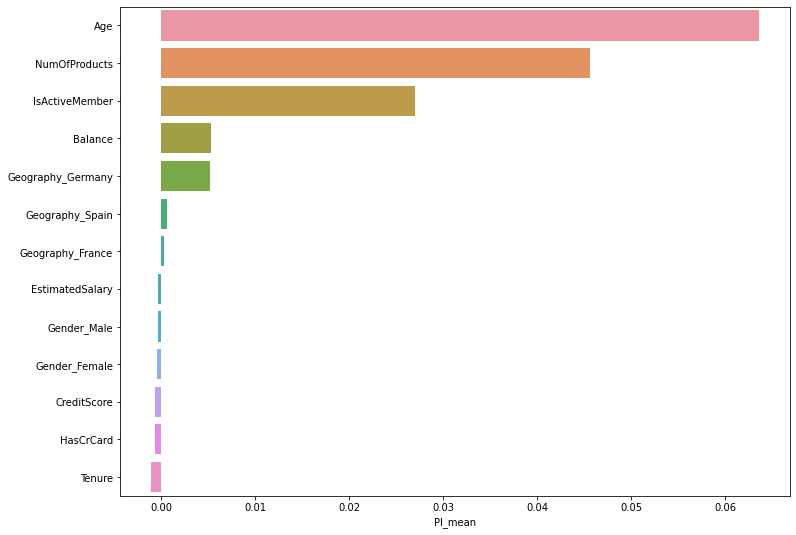

In [ ]:
g1 = sns.barplot(x="PI_mean", y=PI_res.index, data=PI_res)
g1.figure.set_size_inches(12, 9)

### SHAP

In [ ]:
!pip install shap
import shap


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 8.7 MB/s 


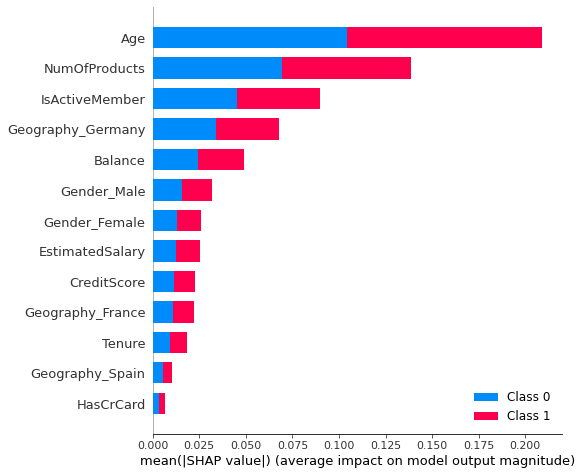

In [ ]:
explainer = shap.TreeExplainer(best_RF_model)
shap_values = explainer.shap_values(X_test,approximate=True)
shap.summary_plot(shap_values, X_test, plot_type="bar")

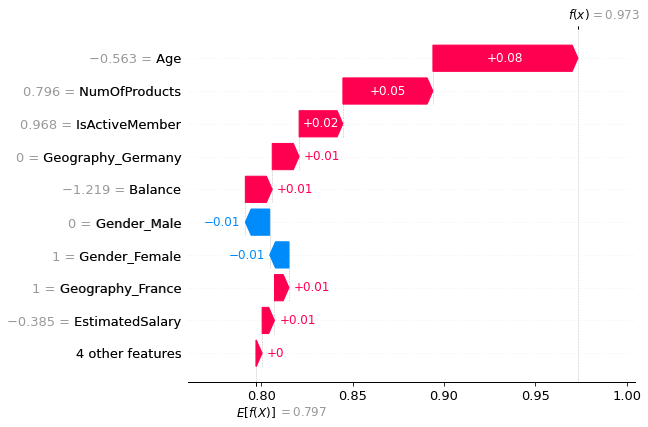

In [ ]:
row = 8
shap.waterfall_plot(shap.Explanation(values=shap_values[0][row], base_values=explainer.expected_value[0], data=X_test.iloc[row],   feature_names=X_test.columns.tolist()))

## Conclusion:
* The RF model has the best performance among three models, its AUC is 0.84
* The top 5 features that influence customer churn retention are age, numofproduct, IsActiveMember, germany, and balance.
* The features importances matches with data exploration insights. 

## Recommendations:
* Further reasearch need to be done to find out why older people have high probability  to exit. 
* Find out why germany tends to churn.
